<a href="https://colab.research.google.com/github/nerobite/neural_networks/blob/main/%D0%90%D1%80%D1%85%D0%B8%D1%82%D0%B5%D0%BA%D1%82%D1%83%D1%80%D1%8B_%D1%81%D0%B2%D1%91%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D1%85_%D1%81%D0%B5%D1%82%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

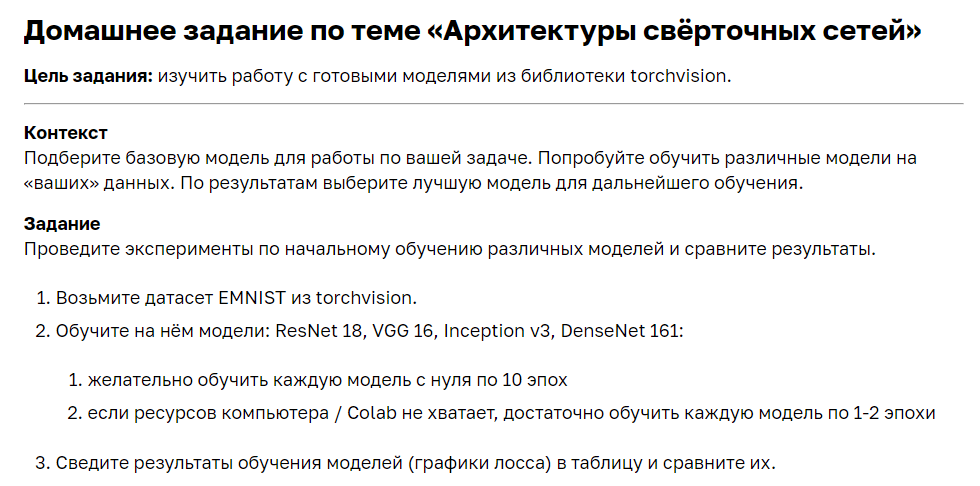

In [49]:
pip install torchinfo

In [50]:
import torch
from torch import nn
import torchvision as tv
from torchsummary import summary
from torchinfo import summary
import time

In [ ]:
BATCH_SIZE = 256
transoforms = tv.transforms.Compose([
    tv.transforms.Grayscale(3),
    tv.transforms.Resize((299, 299)),
    tv.transforms.ToTensor()
])
train_dataset = tv.datasets.EMNIST('.', 'digits', train=True, transform=transoforms, download=True)
test_dataset = tv.datasets.EMNIST('.', 'digits', train=False, transform=transoforms, download=True)
train_iter = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test_iter = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

100%|███████████████████████████████████████████████████████████████| 561753746/561753746 [01:03<00:00, 8845044.32it/s]


Extracting .\EMNIST\raw\gzip.zip to .\EMNIST\raw


In [ ]:
train_dataset[0][0].shape #для inception

torch.Size([3, 299, 299])

In [ ]:
def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0, 0
    net.eval()
    for X, y in data_iter:
        X, y = X.to(device), y.to(device)
        acc_sum += (net(X).argmax(axis=1) == y).sum()
        n += y.shape[0]
    return acc_sum.item() / n

In [ ]:
def train(net, train_iter, test_iter, trainer, num_epochs):
    net.to(device)
    loss = nn.CrossEntropyLoss(reduction='sum')
    net.train()
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n, start = 0.0, 0.0, 0, time.time()

        for i, (X, y) in enumerate(train_iter):
            X, y = X.to(device), y.to(device)
            trainer.zero_grad()
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            trainer.step()
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(axis=1) == y).sum().item()
            n += y.shape[0]

            if i % 100 == 0:
              print(f"Step {i}. time since epoch: {time.time() -  start:.3f}. "
                    f"Train acc: {train_acc_sum / n:.3f}. Train Loss: {train_l_sum / n:.3f}")
        test_acc = evaluate_accuracy(test_iter, net.to(device))
        print('-' * 20)
        print(f'epoch {epoch + 1}, loss {train_l_sum / n:.4f}, train acc {train_acc_sum / n:.3f}'
              f', test acc {test_acc:.3f}, time {time.time() - start:.1f} sec')

In [ ]:
model_ResNet18 = tv.models.resnet18(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 105MB/s]


In [ ]:
model_ResNet18

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
summary(model_ResNet18.to(device), input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [ ]:
# Убираем требование градиента:
for param in model_ResNet18.parameters():
    param.requires_grad = False

In [ ]:
model_ResNet18.fc

Linear(in_features=512, out_features=1000, bias=True)

In [ ]:
model_ResNet18.fc = nn.Linear(in_features=512, out_features=10)

In [ ]:
summary(model_ResNet18.to(device), input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [ ]:
print("Params to learn:")
params_to_update = []
for name, param in model_ResNet18.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        print("\t",name)

Params to learn:
	 fc.weight
	 fc.bias


In [ ]:
trainer = torch.optim.Adam(params_to_update, lr=0.001)

In [ ]:
train(model_ResNet18, train_iter, test_iter, trainer, 2)

Step 0. time since epoch: 1.166. Train acc: 0.102. Train Loss: 2.465
Step 10. time since epoch: 8.467. Train acc: 0.290. Train Loss: 2.094
Step 20. time since epoch: 14.867. Train acc: 0.461. Train Loss: 1.832
Step 30. time since epoch: 21.741. Train acc: 0.570. Train Loss: 1.626
Step 40. time since epoch: 28.159. Train acc: 0.634. Train Loss: 1.462
Step 50. time since epoch: 35.069. Train acc: 0.677. Train Loss: 1.334
Step 60. time since epoch: 42.850. Train acc: 0.710. Train Loss: 1.230
Step 70. time since epoch: 50.412. Train acc: 0.734. Train Loss: 1.147
Step 80. time since epoch: 57.380. Train acc: 0.755. Train Loss: 1.074
Step 90. time since epoch: 63.762. Train acc: 0.772. Train Loss: 1.012
Step 100. time since epoch: 70.900. Train acc: 0.784. Train Loss: 0.961
Step 110. time since epoch: 77.406. Train acc: 0.796. Train Loss: 0.914
Step 120. time since epoch: 85.108. Train acc: 0.807. Train Loss: 0.873
Step 130. time since epoch: 91.786. Train acc: 0.816. Train Loss: 0.837
Step 

In [ ]:
# Две эпохи обучает слишком долго, следующие задания будем выполнять на 1 эпохе...

In [ ]:
model_vgg16 = tv.models.vgg16(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:04<00:00, 134MB/s]


In [ ]:
summary(model_vgg16.to(device), input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [ ]:
# Убираем требование градиента:
for param in model_vgg16.parameters():
    param.requires_grad = False

In [ ]:
model_vgg16.classifier[6] = nn.Linear(in_features=4096, out_features=10)

In [ ]:
summary(model_vgg16.to(device), input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [ ]:
print("Params to learn:")
params_to_update = []
for name, param in model_vgg16.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        print("\t",name)

Params to learn:
	 classifier.6.weight
	 classifier.6.bias


In [ ]:
torch.cuda.empty_cache()

In [ ]:
train(net=model_vgg16, train_iter=train_iter, test_iter=test_iter, trainer=trainer, num_epochs=1)

Step 0. time since epoch: 2.270. Train acc: 0.152. Train Loss: 2.359
Step 100. time since epoch: 159.553. Train acc: 0.768. Train Loss: 0.834
Step 200. time since epoch: 320.497. Train acc: 0.819. Train Loss: 0.643
Step 300. time since epoch: 481.444. Train acc: 0.840. Train Loss: 0.559
Step 400. time since epoch: 642.988. Train acc: 0.852. Train Loss: 0.508
Step 500. time since epoch: 805.335. Train acc: 0.861. Train Loss: 0.475


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with an OutOfMemoryError: CUDA out of memory. Tried to allocate 6.89 GiB. GPU  (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:924.)
  return F.conv2d(input, weight, bias, self.stride,


Step 600. time since epoch: 967.374. Train acc: 0.867. Train Loss: 0.449
Step 700. time since epoch: 1131.360. Train acc: 0.872. Train Loss: 0.429
Step 800. time since epoch: 1293.532. Train acc: 0.876. Train Loss: 0.413
Step 900. time since epoch: 1454.721. Train acc: 0.879. Train Loss: 0.401
--------------------
epoch 1, loss 0.3964, train acc 0.880, test acc 0.957, time 1711.2 sec


In [ ]:
model_inception = tv.models.inception_v3(pretrained=True)

C:\Users\Никита\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Никита\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to C:\Users\Никита/.cache\torch\hub\checkpoints\inception_v3_google-0cc3c7bd.pth
100%|███████████████████████████████████████████████████████████████████████████████| 104M/104M [00:08<00:00, 13.1MB/s]


In [ ]:
summary(model_inception.to(device), input_size=(3, 299, 299))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 149, 149]             864
       BatchNorm2d-2         [-1, 32, 149, 149]              64
       BasicConv2d-3         [-1, 32, 149, 149]               0
            Conv2d-4         [-1, 32, 147, 147]           9,216
       BatchNorm2d-5         [-1, 32, 147, 147]              64
       BasicConv2d-6         [-1, 32, 147, 147]               0
            Conv2d-7         [-1, 64, 147, 147]          18,432
       BatchNorm2d-8         [-1, 64, 147, 147]             128
       BasicConv2d-9         [-1, 64, 147, 147]               0
        MaxPool2d-10           [-1, 64, 73, 73]               0
           Conv2d-11           [-1, 80, 73, 73]           5,120
      BatchNorm2d-12           [-1, 80, 73, 73]             160
      BasicConv2d-13           [-1, 80, 73, 73]               0
           Conv2d-14          [-1, 192,

In [ ]:
# Убираем требование градиента:
for param in model_inception.parameters():
    param.requires_grad = False

In [ ]:
model_inception.fc = nn.Linear(in_features=2048, out_features=10)

In [ ]:
summary(model_inception.to(device), input_size=(3, 299, 299))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 149, 149]             864
       BatchNorm2d-2         [-1, 32, 149, 149]              64
       BasicConv2d-3         [-1, 32, 149, 149]               0
            Conv2d-4         [-1, 32, 147, 147]           9,216
       BatchNorm2d-5         [-1, 32, 147, 147]              64
       BasicConv2d-6         [-1, 32, 147, 147]               0
            Conv2d-7         [-1, 64, 147, 147]          18,432
       BatchNorm2d-8         [-1, 64, 147, 147]             128
       BasicConv2d-9         [-1, 64, 147, 147]               0
        MaxPool2d-10           [-1, 64, 73, 73]               0
           Conv2d-11           [-1, 80, 73, 73]           5,120
      BatchNorm2d-12           [-1, 80, 73, 73]             160
      BasicConv2d-13           [-1, 80, 73, 73]               0
           Conv2d-14          [-1, 192,

In [ ]:
print("Params to learn:")
params_to_update = []
for name, param in model_inception.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        print("\t",name)

Params to learn:
	 fc.weight
	 fc.bias


In [ ]:
def train(net, train_iter, test_iter, trainer, num_epochs):
    net.to(device)
    loss = nn.CrossEntropyLoss(reduction='sum')
    net.train()
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n, start = 0.0, 0.0, 0, time.time()

        for i, (X, y) in enumerate(train_iter):
            X, y = X.to(device), y.to(device)
            trainer.zero_grad()
            outputs = net(X)
            # Для Inception v3, outputs - это объект InceptionOutputs
            # Основной выход находится в outputs.logits
            y_hat = outputs.logits
            l = loss(y_hat, y)
            l.backward()
            trainer.step()
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(axis=1) == y).sum().item()
            n += y.shape[0]

            if i % 100 == 0:
              print(f"Step {i}. time since epoch: {time.time() - start:.3f}. "
                    f"Train acc: {train_acc_sum / n:.3f}. Train Loss: {train_l_sum / n:.3f}")
        test_acc = evaluate_accuracy(test_iter, net.to(device))
        print('-' * 20)
        print(f'epoch {epoch + 1}, loss {train_l_sum / n:.4f}, train acc {train_acc_sum / n:.3f}'
              f', test acc {test_acc:.3f}, time {time.time() - start:.1f} sec')

def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0, 0
    net.eval()
    with torch.no_grad():
        for X, y in data_iter:
            X, y = X.to(device), y.to(device)
            outputs = net(X)
            y_hat = outputs.argmax(axis=1)
            acc_sum += (y_hat == y).sum()
            n += y.shape[0]
    return acc_sum.item() / n

In [ ]:
optimizer = torch.optim.Adam(model_inception.fc.parameters(), lr=0.01)
train(net=model_inception, train_iter=train_iter, test_iter=test_iter, trainer=optimizer, num_epochs=1)

Step 0. time since epoch: 41.107. Train acc: 0.117. Train Loss: 2.360
Step 100. time since epoch: 4724.762. Train acc: 0.695. Train Loss: 1.079
Step 200. time since epoch: 8962.181. Train acc: 0.764. Train Loss: 0.797
Step 300. time since epoch: 12648.796. Train acc: 0.790. Train Loss: 0.692
Step 400. time since epoch: 16349.154. Train acc: 0.803. Train Loss: 0.638
Step 500. time since epoch: 20045.941. Train acc: 0.811. Train Loss: 0.609
Step 600. time since epoch: 23733.337. Train acc: 0.816. Train Loss: 0.589
Step 700. time since epoch: 27472.482. Train acc: 0.820. Train Loss: 0.575
Step 800. time since epoch: 31181.751. Train acc: 0.822. Train Loss: 0.568
Step 900. time since epoch: 34876.023. Train acc: 0.824. Train Loss: 0.564
--------------------
epoch 1, loss 0.5634, train acc 0.824, test acc 0.890, time 41685.0 sec


In [ ]:
# гугл GPU дает только на 1 час, на домашнем CPU метрика считалась больше 11 часов....

In [53]:
from collections import OrderedDict
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision as tv
import time
from torchinfo import summary

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

BATCH_SIZE = 256
transforms = tv.transforms.Compose([
    tv.transforms.Grayscale(3),
    tv.transforms.Resize((224, 224)),
    tv.transforms.ToTensor()
])
train_dataset = tv.datasets.EMNIST('.', 'digits', train=True, transform=transforms, download=True)
test_dataset = tv.datasets.EMNIST('.', 'digits', train=False, transform=transforms, download=True)
train_iter = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test_iter = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

model = tv.models.densenet161(pretrained=True)

# Убираем требование градиента:
for param in model.parameters():
    param.requires_grad = False

model.classifier = nn.Linear(in_features=2208, out_features=10)

# Используем torchinfo для получения информации о модели
summary(model.to(device), input_size=(BATCH_SIZE, 3, 224, 224))

print("Params to learn:")
params_to_update = []
for name, param in model.named_parameters():
    if param.requires_grad:
        params_to_update.append(param)
        print("\t",name)

trainer = optim.Adam(params_to_update, lr=0.001)

def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0, 0
    net.eval()
    with torch.no_grad():
        for X, y in data_iter:
            X, y = X.to(device), y.to(device)
            acc_sum += (net(X).argmax(axis=1) == y).sum()
            n += y.shape[0]
    return acc_sum.item() / n

def train(net, train_iter, test_iter, trainer, num_epochs):
    net.to(device)
    loss = nn.CrossEntropyLoss(reduction='sum')
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n, start = 0.0, 0.0, 0, time.time()
        net.train()
        for i, (X, y) in enumerate(train_iter):
            X, y = X.to(device), y.to(device)
            trainer.zero_grad()
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            trainer.step()
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(axis=1) == y).sum().item()
            n += y.shape[0]

            if i % 10 == 0:
                print(f"Step {i}. time since epoch: {time.time() -  start:.3f}. "
                      f"Train acc: {train_acc_sum / n:.3f}. Train Loss: {train_l_sum / n:.3f}")
        test_acc = evaluate_accuracy(test_iter, net.to(device))
        print('-' * 20)
        print(f'epoch {epoch + 1}, loss {train_l_sum / n:.4f}, train acc {train_acc_sum / n:.3f}'
              f', test acc {test_acc:.3f}, time {time.time() - start:.1f} sec')

train(model, train_iter, test_iter, trainer, 1)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet161_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet161_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Params to learn:
	 classifier.weight
	 classifier.bias
Step 0. time since epoch: 2.732. Train acc: 0.066. Train Loss: 2.352
Step 10. time since epoch: 26.985. Train acc: 0.406. Train Loss: 1.979
Step 20. time since epoch: 50.342. Train acc: 0.571. Train Loss: 1.689
Step 30. time since epoch: 73.362. Train acc: 0.649. Train Loss: 1.481
Step 40. time since epoch: 97.219. Train acc: 0.697. Train Loss: 1.320
Step 50. time since epoch: 121.569. Train acc: 0.731. Train Loss: 1.198
Step 60. time since epoch: 145.792. Train acc: 0.755. Train Loss: 1.104
Step 70. time since epoch: 169.219. Train acc: 0.774. Train Loss: 1.028
Step 80. time since epoch: 192.652. Train acc: 0.790. Train Loss: 0.961
Step 90. time since epoch: 216.603. Train acc: 0.803. Train Loss: 0.906
Step 100. time since epoch: 240.626. Train acc: 0.813. Train Loss: 0.861
Step 110. time since epoch: 264.129. Train acc: 0.823. Train Loss: 0.820
Step 120. time since epoch: 287.456. Train acc: 0.831. Train Loss: 0.784
Step 130. tim

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


--------------------
epoch 1, loss 0.2686, train acc 0.937, test acc 0.968, time 2456.7 sec


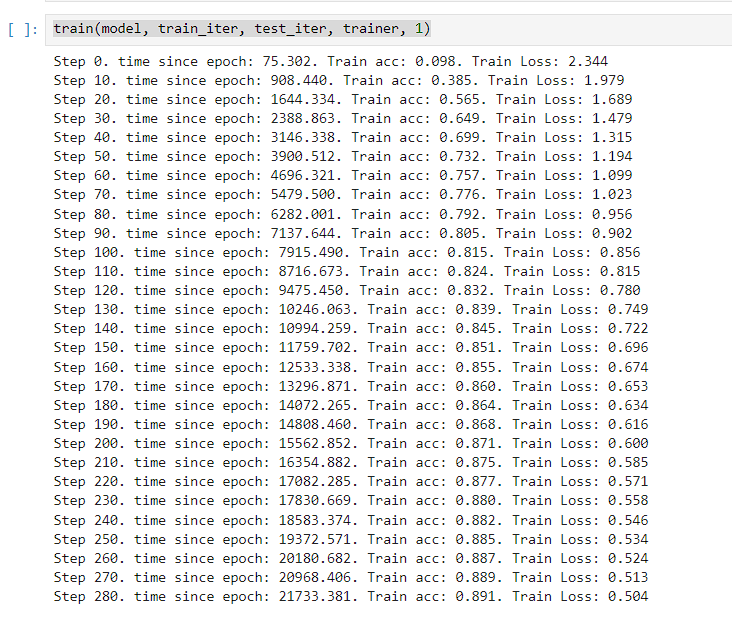

In [ ]:
#после нескольких часов обучения на пк, юпитер ноутбук выдал ошибку и все отвалилось, гугл жадный, дает GPU только на час.... поэтому выполнения дз целый квест...

In [54]:
import pandas as pd

In [60]:
df = pd.DataFrame({
    'Модель': ['ResNet18', 'vgg16', 'inception_v3', 'densenet161'],
    'Train acc': [0.969, 0.880, 0.824, 0.937],
    'Test acc': [0.972, 0.957, 0.890, 0.968],
})

In [61]:
df

,Модель,Train acc,Test acc
0,ResNet18,0.969,0.972
1,vgg16,0.880,0.957
2,inception_v3,0.824,0.890
3,densenet161,0.937,0.968


In [ ]:
#Из проделанного выше, можно сделать вовыд, что не всегда большая и объемная модель решает задачи классификации лучше,
#а по результатам, ResNet18 просто вне конкуренции, т.к. имеет лучший результат и самое быстро время выполнения